In [1]:
import pandas as pd
df = pd.read_csv('dataset_mhs2024.csv', sep=',')
df.rename(columns={'Berat (Kg)':'Berat'}, inplace=True)
df.rename(columns={'Tinggi (cm)':'Tinggi'}, inplace=True)
df

,Timestamp,Nama,Umur,Jenis Kelamin,Berat,Tinggi
0,12/19/2024 13:11,Pathi,19,Laki-laki,70,169
1,12/19/2024 13:11,Diah Ayu Puspasari,19,Perempuan,44,157
2,12/19/2024 13:11,Sahrul Firdaus,20,Laki-laki,50,161
3,12/19/2024 13:12,Aulia Nisya Nur Rahma Safitri,19,Perempuan,40,153
4,12/19/2024 13:12,Muhammad Fauzan Adhima,20,Laki-laki,45,160
5,12/19/2024 13:12,Ainisa Dinda Iskandar,19,Perempuan,46,153
6,12/19/2024 13:12,Mohammad Ghifari Rizkullah,20,Laki-laki,58,165
7,12/19/2024 13:12,Muhamad Akbar Rabbani,19,Laki-laki,58,175
8,12/19/2024 13:13,Indri Rachma,21,Perempuan,40,162
9,12/19/2024 13:13,Safira Innayah Azzahro,20,Perempuan,45,160


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

x = df[['Umur', 'Tinggi']].to_numpy
y = df['Berat'].to_numpy()

x = sm.add_constant(x)
model_prediksi = sm.OLS(y, x).fit()
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     4.414
Date:                Thu, 19 Dec 2024   Prob (F-statistic):             0.0297
Time:                        13:50:14   Log-Likelihood:                -70.024
No. Observations:                  19   AIC:                             146.0
Df Residuals:                      16   BIC:                             148.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -120.3258     84.029     -1.432      0.1

c:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
df1 = pd.read_csv('datatesting_mhs2024.csv', sep=',')
df1.rename(columns={'Berat (Kg)':'Berat'}, inplace=True)
df1.rename(columns={'Tinggi (cm)':'Tinggi'}, inplace=True)
x_tes = df1[['Umur', 'Tinggi']].to_numpy()
y_real = df1['Berat'].to_numpy()
y_nama = df1['Nama'].to_numpy()
x_tes = sm.add_constant(x_tes)
y_pred = model_prediksi.predict(x_tes)

In [4]:
df = pd.DataFrame()
df['Nama Mahasiswa']=y_nama
df['Berat Real']=y_real
df['Berat Prediksi']=y_pred
df['ERROR']=df['Berat Real']-df['Berat Prediksi']
df['PERSEN PREDIKSI']=1.0-(abs(df['ERROR'])/df['Berat Real'])
df['PERSEN']=df['PERSEN PREDIKSI']*100
display(df)

,Nama Mahasiswa,Berat Real,Berat Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,Eka Kartini,57,58.512307,-1.512307,0.973468,97.346829
1,Nurhayati,47,41.238809,5.761191,0.877421,87.742148
2,Sabrina Jasmine Rambu Diena,70,47.075343,22.924657,0.672505,67.250490
3,Elyas Randi Renaldi,41,59.471946,-18.471946,0.549465,54.946473
4,Leohafs Sri Indrapura R Zain,60,58.433606,1.566394,0.973893,97.389344


In [5]:
df.to_csv('dataset_hasil2024.csv')
datasets = pd.read_csv('dataset_hasil2024.csv', sep=',')
datasets

,Unnamed: 0,Nama Mahasiswa,Berat Real,Berat Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,0,Eka Kartini,57,58.512307,-1.512307,0.973468,97.346829
1,1,Nurhayati,47,41.238809,5.761191,0.877421,87.742148
2,2,Sabrina Jasmine Rambu Diena,70,47.075343,22.924657,0.672505,67.250490
3,3,Elyas Randi Renaldi,41,59.471946,-18.471946,0.549465,54.946473
4,4,Leohafs Sri Indrapura R Zain,60,58.433606,1.566394,0.973893,97.389344


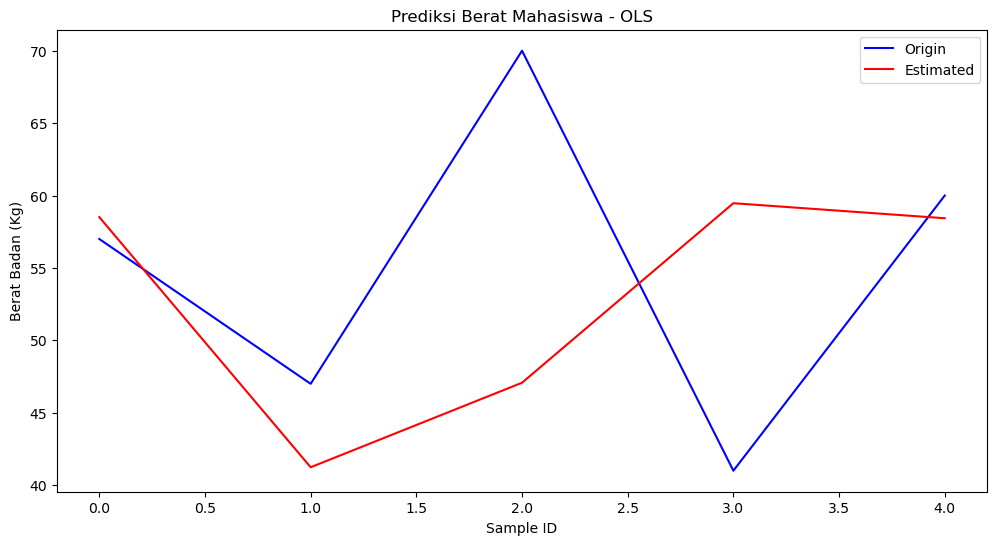

In [6]:
plt.figure(figsize=(12,6))
x = datasets.iloc[:, 0].values
plt.plot(x, datasets['Berat Real'], label='Origin', color='b')
plt.plot(x, datasets['Berat Prediksi'], label='Estimated', color='r')

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Berat Badan (Kg)')
plt.title('Prediksi Berat Mahasiswa - OLS')
plt.show()